# Download The Data Files

In [171]:
# !pip install kaggle
# import kaggle

# !mkdir -p ~/.kaggle
# !cp "/content/drive/My Drive/Colab Notebooks/KGP Talkie DL/kaggle.json" ~/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json

!rm -rf "/content/Data-Files-for-Feature-Selection"
!git clone "https://github.com/laxmimerit/Data-Files-for-Feature-Selection"
!cp -r "/content/Data-Files-for-Feature-Selection" "/content/drive/My Drive/Colab Notebooks/KGP Talkie DL/02 Feature Selection/datasets/"
!rm -rf "/content/Data-Files-for-Feature-Selection"

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 6), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (17/17), done.


# Feature Selection with Filtering Methods

### Univarite -> Fisher Score , Mutual Information Gain , Variance , etc.
### Multivariate -> Pearson Correlation

# Univariate Feature Selection

## Constant Feature Removal

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [174]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/KGP Talkie DL/02 Feature Selection/datasets/Data-Files-for-Feature-Selection/santander-train.csv" , nrows = 20000 )
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [175]:
X = data.drop("TARGET" , axis = 1)
y = data["TARGET"]

X.shape , y.shape

((20000, 370), (20000,))

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,
                                                       random_state = 0 , stratify= y)

# Constant Feature Removal

In [177]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [178]:
# Removing the constant features
constant_filter.get_support().sum()

291

In [179]:
# Inverting the filter list
constant_list = [not temp for temp in constant_filter.get_support()]
print(constant_list)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, 

In [180]:
# Printing the list of constant features
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [0]:
# Transorm the dataset into non-constant feature space 
# Basically removing the constant features
# To prevent overfitting
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [182]:
X_train_filter.shape, X_test_filter.shape, X_train.shape , X_test.shape

((16000, 291), (4000, 291), (16000, 370), (4000, 370))

## Quasi Constant Feature Removal

In [0]:
# Removing feature almost constant or somewhat near to constant(Quasi Constant)
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [184]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [185]:
quasi_constant_filter.get_support().sum()

245

In [186]:
print(291 - 245 , "are quasi constant")

46 are quasi constant


In [0]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)


In [188]:
X_train_quasi_filter.shape,X_test_quasi_filter.shape

((16000, 245), (4000, 245))

## Remove Duplicate Features

In [0]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [190]:
# Pandas Dataframe has become a numpy array
type(X_train_T)

numpy.ndarray

In [191]:
# Changing it back to Pandas Dataframe
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

X_train_T.shape , X_test_T.shape

((245, 16000), (245, 4000))

In [192]:
X_train_T.duplicated().sum()

18

In [193]:
# Finding the duplicated features
duplicated_features = X_train_T.duplicated()
print(duplicated_features)

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool


In [194]:
# Inverting the dupkicated list to find the features to keep
features_to_keep = [not index for index in duplicated_features]
print(features_to_keep)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [0]:
# After removing constant , quasi-constant and duplicate features
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [196]:
X_train_unique.shape,X_train.shape

((16000, 227), (16000, 370))

In [197]:
print(370 - 227 , "# After removing constant , quasi-constant and duplicate features")

143 # After removing constant , quasi-constant and duplicate features


## Building ML Model and compare the performance of the selected features

In [0]:
def run_randomForest(X_train,X_test, y_train , y_test):
    clf = RandomForestClassifier(n_estimators=100 , random_state=0 , n_jobs=-1)
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on the test set")
    print(accuracy_score(y_test , y_pred))


In [199]:
# Magic Cell
%%time
run_randomForest(X_train_unique , X_test_unique , y_train , y_test)

Accuracy on the test set
0.95875
CPU times: user 4.29 s, sys: 34.5 ms, total: 4.33 s
Wall time: 2.38 s


In [200]:
%%time
run_randomForest(X_train , X_test , y_train , y_test)

Accuracy on the test set
0.9585
CPU times: user 4.93 s, sys: 23.4 ms, total: 4.95 s
Wall time: 2.81 s


In [201]:
print("Performance Gain" , 95.875 - 95.85 , "percentage")
print("Time Saved" , 2.61 - 2.21 , "seconds")

Performance Gain 0.025000000000005684 percentage
Time Saved 0.3999999999999999 seconds


# Multivariate Feature Selection

- Correlation between the feature space and the output is desirable but correlation amongst features is not desirable

- Correlated features are redundant and can lead to curse of dimensionality

In [0]:
corrmat = X_train_unique.corr()

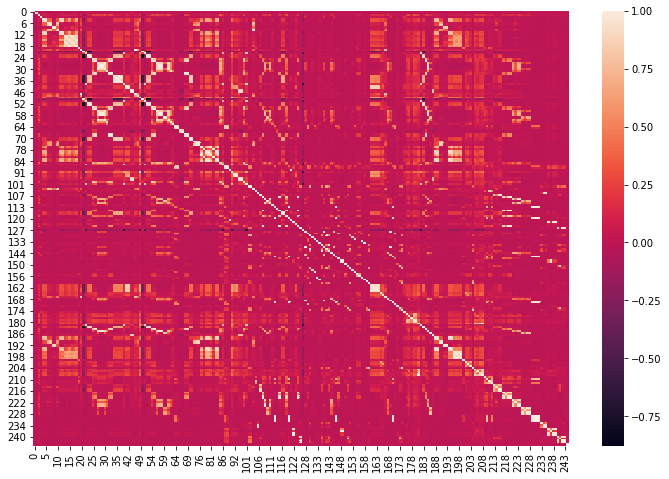

In [203]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [0]:
def get_correlation(data , threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [205]:
corr_features = get_correlation(X_train_unique , 0.85)
print(corr_features)

{5, 7, 9, 11, 12, 14, 15, 16, 17, 18, 23, 24, 28, 29, 30, 32, 33, 35, 36, 38, 42, 46, 47, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 67, 68, 69, 70, 72, 76, 80, 81, 82, 83, 84, 86, 87, 88, 91, 93, 95, 98, 100, 101, 103, 104, 111, 115, 117, 120, 121, 125, 136, 138, 143, 146, 149, 153, 154, 157, 158, 161, 162, 163, 164, 169, 170, 173, 180, 182, 183, 184, 185, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 204, 205, 207, 208, 215, 216, 217, 219, 220, 221, 223, 224, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243}


In [206]:
len(corr_features)

124

In [0]:
X_train_uncorr = X_train_unique.drop(labels = corr_features , axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features , axis = 1)

In [208]:
X_train_uncorr.shape,X_test_uncorr.shape

((16000, 103), (4000, 103))

In [209]:
%%time
run_randomForest(X_train_uncorr , X_test_uncorr , y_train , y_test)

Accuracy on the test set
0.95875
CPU times: user 3.38 s, sys: 42.1 ms, total: 3.42 s
Wall time: 1.96 s


In [210]:
%%time
run_randomForest(X_train, X_test , y_train , y_test)

Accuracy on the test set
0.9585
CPU times: user 4.9 s, sys: 20.5 ms, total: 4.92 s
Wall time: 2.7 s


In [211]:
print("Time Saved" , 2.59 - 1.86 , "seconds")

Time Saved 0.7299999999999998 seconds


## Feature Grouping and Feature Importance

### no need to eliminate all the correlated features

In [212]:
corrmat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,40,41,...,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244
0,1.000000,-0.025277,-0.001942,0.003594,0.004054,-0.001697,-0.015882,-0.019807,0.000956,-0.000588,-0.012443,0.010319,0.005268,0.017605,0.016960,0.018040,0.017400,0.016745,0.015206,-0.000103,-0.001198,-0.006814,-0.002037,0.010356,0.012021,0.001732,0.001138,-0.004836,-0.006480,-0.005811,-0.003929,-0.002340,0.004714,0.005018,0.005088,0.006998,0.005580,0.007236,0.001648,-0.000359,...,0.007040,-0.001282,0.013583,0.008546,-0.002296,0.004097,0.006333,0.005441,0.006393,0.001991,0.006937,0.004924,0.008100,-0.000582,0.007130,0.007675,-0.006477,-0.010219,-0.011386,-0.011200,0.006455,0.008361,0.003765,0.005352,0.008042,0.007870,0.007952,0.008021,-0.001596,0.001830,-0.001337,0.002051,-0.008500,0.006554,0.005907,0.008825,-0.009174,0.012031,0.012128,0.006612
1,-0.025277,1.000000,-0.007647,0.001819,0.008981,0.009232,0.001638,0.001746,0.000614,0.000695,0.001517,0.009097,0.009360,-0.002511,-0.001086,0.002426,-0.002401,-0.001019,0.002629,0.000519,0.004590,-0.008975,0.041015,0.008019,0.007439,0.011525,0.009467,0.009771,0.008796,0.008676,0.009662,0.006484,0.009172,0.008687,0.007043,0.006730,0.007178,0.006622,0.050629,0.011849,...,0.003053,0.004967,0.009019,0.006758,0.004488,0.002604,0.003651,0.003672,0.001322,0.000878,0.002152,0.002210,0.003979,0.002581,0.004811,0.004879,0.005759,0.003183,0.006355,0.006248,0.002629,0.001482,0.002827,0.002770,0.000356,0.000338,0.000411,0.000408,0.000391,0.000453,0.000544,0.000586,0.000337,0.000550,0.000563,0.000922,0.000598,0.000875,0.000942,0.000415
2,-0.001942,-0.007647,1.000000,0.030919,0.106245,0.109140,0.048524,0.055708,0.004040,0.005796,0.042368,0.096719,0.098070,0.082025,0.095485,0.106415,0.081028,0.095009,0.110912,0.016886,0.107680,-0.105502,-0.102487,0.107570,0.101605,0.273152,0.231649,0.299165,0.241707,0.237830,0.296879,0.149274,0.262784,0.253780,0.083030,0.091234,0.095103,0.082214,0.032543,0.136317,...,0.205098,0.228133,0.154430,0.227132,0.188957,0.107593,0.132855,0.162295,0.029742,0.014903,0.043278,0.045622,0.149586,0.093124,0.178546,0.179565,0.178263,0.094741,0.200415,0.195652,0.125618,0.059293,0.135362,0.132537,0.023435,0.022679,0.025362,0.025406,0.013612,0.023446,0.025522,0.020168,0.011550,0.019325,0.019527,0.041321,0.016172,0.043577,0.044281,-0.000810
3,0.003594,0.001819,0.030919,1.000000,0.029418,0.024905,0.014513,0.013857,-0.000613,-0.000691,0.012451,0.026377,0.021968,0.016331,0.016458,0.024014,0.015979,0.016239,0.025558,-0.000520,0.007478,-0.002101,0.017541,0.003429,0.004843,0.010099,0.015117,0.036569,0.040420,0.041165,0.037154,-0.001398,0.012668,0.013574,0.007590,0.005443,0.007195,0.005737,0.025432,0.046103,...,0.022688,0.017827,0.038797,0.032181,0.002703,0.001554,0.011326,0.006745,0.003401,-0.000822,0.002314,0.003234,0.001554,-0.001262,0.002540,0.002948,-0.005438,-0.003083,0.025778,0.033042,-0.001532,0.000238,-0.001817,-0.001698,-0.000354,-0.000338,-0.000285,-0.000334,-0.000391,0.008469,0.014032,-0.000583,-0.000337,-0.000548,-0.000561,0.000541,-0.000577,0.000231,0.000235,0.000966
4,0.004054,0.008981,0.106245,0.029418,1.000000,0.888789,0.381632,0.341266,0.012927,0.019674,0.298916,0.938409,0.838953,0.266746,0.326051,0.638412,0.263482,0.324417,0.673593,0.049579,0.227803,-0.208030,0.041167,0.200514,0.220673,0.027387,0.033757,-0.010411,-0.012628,-0.012035,-0.010694,0.030235,0.014793,0.009176,0.232927,0.223937,0.229660,0.226089,0.108756,0.267246,...,0.235397,0.168010,0.268317,0.270899,0.021159,-0.004700,0.055867,0.029543,0.035820,0.110967,0.073627,0.086904,-0.003401,-0.007050,-0.002079,-0.001151,0.002963,0.040691,-0.000914,-0.000322,0.003267,0.012429,0.000824,0.001272,-0.001629,-0.001669,-0.001677,-0.001730,-0.001930,0.000833,0.002328,0.016743,-0.001662,0.020509,0.021276,-0.001905,-0.000635,-0.002552,-0.002736,0.003656
...,...,...

In [213]:
# Stacking of the features
corrdata = corrmat.abs().stack()
corrdata

0    0      1.000000
     1      0.025277
     2      0.001942
     3      0.003594
     4      0.004054
              ...   
244  240    0.011106
     241    0.011807
     242    0.008604
     243    0.009136
     244    1.000000
Length: 51529, dtype: float64

In [214]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

29   58     1.000000e+00
58   29     1.000000e+00
134  158    1.000000e+00
158  134    1.000000e+00
182  182    1.000000e+00
                ...     
229  111    1.934954e-06
231  150    6.044672e-07
150  231    6.044672e-07
231  123    3.966696e-07
123  231    3.966696e-07
Length: 51529, dtype: float64

In [215]:
# The values shown as 1 are not exaclty 1
# This is a limitation of the library
corrdata = corrdata[corrdata > 0.85]
# The correlated features with corr value of 1 are either the same features or duplicate features
corrdata = corrdata[corrdata < 1]
corrdata

143  135    1.000000
135  143    1.000000
136  128    1.000000
128  136    1.000000
31   62     1.000000
              ...   
67   66     0.851384
61   28     0.851022
28   61     0.851022
72   35     0.850893
35   72     0.850893
Length: 534, dtype: float64

In [216]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ["features1" , "features2" , "corr_value"]
corrdata

,features1,features2,corr_value
0,143,135,1.000000
1,135,143,1.000000
2,136,128,1.000000
3,128,136,1.000000
4,31,62,1.000000
...,...,...,...
529,67,66,0.851384
530,61,28,0.851022
531,28,61,0.851022
532,72,35,0.850893


In [0]:
# Creating a group list of correlated features
# Creat a list of group feaures
# Find feature importance of each group
# Select one feature from each group and reject others
grouped_feature_list = []
correlated_groups_list = []

for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)


In [218]:
print(len(grouped_feature_list))
print(grouped_feature_list)

193
[135, 143, 128, 169, 136, 62, 31, 47, 20, 23, 24, 53, 21, 183, 52, 69, 32, 68, 26, 55, 184, 33, 133, 157, 149, 148, 237, 132, 154, 230, 229, 231, 232, 113, 120, 170, 146, 122, 239, 236, 238, 78, 82, 115, 219, 125, 220, 217, 108, 197, 196, 198, 199, 208, 205, 207, 181, 14, 16, 13, 17, 243, 126, 240, 242, 57, 58, 29, 185, 27, 30, 61, 28, 22, 182, 51, 46, 98, 95, 44, 81, 80, 84, 77, 223, 224, 221, 111, 109, 8, 193, 192, 9, 228, 225, 227, 117, 116, 49, 91, 25, 100, 54, 75, 74, 191, 190, 76, 35, 34, 36, 72, 38, 15, 16, 13, 18, 107, 216, 215, 61, 27, 30, 56, 163, 161, 164, 41, 162, 103, 102, 79, 188, 84, 194, 80, 189, 83, 72, 35, 70, 60, 59, 189, 80, 194, 84, 188, 79, 195, 234, 106, 235, 104, 10, 179, 180, 151, 241, 41, 161, 164, 42, 5, 11, 12, 11, 5, 4, 92, 93, 121, 89, 87, 88, 204, 174, 21, 50, 7, 6, 65, 87, 64, 86, 40, 101, 153, 131, 151, 173, 67, 66]


In [219]:
print(len(correlated_groups_list))
type(correlated_groups_list)

56


list

In [220]:
X_train.shape , X_train_uncorr.shape

((16000, 370), (16000, 103))

In [221]:
for group in correlated_groups_list:
    print(group)

   features1  features2  corr_value
0        143        135         1.0
     features1  features2  corr_value
2          136        128    1.000000
197        136        169    0.959468
   features1  features2  corr_value
4         31         62         1.0
   features1  features2  corr_value
6         20         47         1.0
     features1  features2  corr_value
8           52         23    1.000000
297         52         24    0.927683
299         52         53    0.927683
448         52         21    0.877297
505         52        183    0.860163
     features1  features2  corr_value
12          33         69    1.000000
224         33         32    0.947113
228         33         68    0.946571
322         33         26    0.917665
337         33         55    0.914178
422         33        184    0.884383
    features1  features2  corr_value
14        157        133         1.0
    features1  features2  corr_value
16        237        149    1.000000
26        237        148    

## Feature Importance based on tree based classifiers

In [224]:
def get_important_features(important_features):
    for group in correlated_groups_list:
        features = list(group.features1.unique()) + list(group.features2.unique())
        rf = RandomForestClassifier(n_estimators=100 , random_state= 0 )
        rf.fit(X_train_unique[features] , y_train)

        importance = pd.concat([pd.Series(features) , pd.Series(rf.feature_importances_)] , axis = 1)
        importance.columns = ["features" , "importance"]
        importance.sort_values(by = "importance" , ascending = False , inplace = True)
        feat = importance.iloc[0]
        important_features.append(feat)

important_features = []
get_important_features(important_features)
important_features

[features      135.00
 importance      0.51
 Name: 1, dtype: float64, features      128.000000
 importance      0.563757
 Name: 1, dtype: float64, features      62.00
 importance     0.51
 Name: 1, dtype: float64, features      47.00
 importance     0.51
 Name: 1, dtype: float64, features      183.000000
 importance      0.285817
 Name: 5, dtype: float64, features      184.00000
 importance      0.34728
 Name: 6, dtype: float64, features      157.000000
 importance      0.523077
 Name: 0, dtype: float64, features      148.000000
 importance      0.624498
 Name: 2, dtype: float64, features      132.000000
 importance      0.565217
 Name: 1, dtype: float64, features      120.000000
 importance      0.749683
 Name: 6, dtype: float64, features      122.000000
 importance      0.343434
 Name: 1, dtype: float64, features      82.000000
 importance     0.518827
 Name: 0, dtype: float64, features      125.000000
 importance      0.940524
 Name: 3, dtype: float64, features      197.000000
 impo

In [0]:
important_features = pd.DataFrame(important_features)

In [0]:
important_features.reset_index(inplace=True , drop = True)

In [228]:
important_features

,features,importance
0,135.0,0.510000
1,128.0,0.563757
2,62.0,0.510000
3,47.0,0.510000
4,183.0,0.285817
5,184.0,0.347280
6,157.0,0.523077
7,148.0,0.624498
8,132.0,0.565217
9,120.0,0.749683


In [0]:
features_to_consider = set(important_features["features"])

In [0]:
features_to_discard = set(corr_features) - set(features_to_consider)

In [0]:
features_to_discard = list(features_to_discard)

In [233]:
X_train_grouped_uncorr = X_train_unique.drop(labels=features_to_discard , axis = 1)
X_train_grouped_uncorr.shape

(16000, 140)

In [235]:
X_test_grouped_uncorr = X_test_unique.drop(labels=features_to_discard , axis = 1)
X_test_grouped_uncorr.shape

(4000, 140)

In [236]:
%%time
run_randomForest(X_train_grouped_uncorr, X_test_grouped_uncorr , y_train , y_test)

Accuracy on the test set
0.95775
CPU times: user 3.65 s, sys: 29 ms, total: 3.68 s
Wall time: 1.96 s


In [237]:
%%time
run_randomForest(X_train, X_test , y_train , y_test)

Accuracy on the test set
0.9585
CPU times: user 4.97 s, sys: 33.4 ms, total: 5.01 s
Wall time: 2.69 s


In [238]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr , y_train , y_test)

Accuracy on the test set
0.95875
CPU times: user 3.3 s, sys: 20.8 ms, total: 3.33 s
Wall time: 1.86 s
